<a href="https://colab.research.google.com/github/Sarva-shakti-Singh/Deep-Learning/blob/main/DLproject_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
# Define the common root directory for both train and test data
PROJECT_ROOT = "/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage"

# Define TRAIN and TEST paths based on the PROJECT_ROOT
TRAIN = os.path.join(PROJECT_ROOT, 'train')
TEST = os.path.join(PROJECT_ROOT, 'test')

# DATA_DIR was previously used, let's keep it consistent by aliasing it to TRAIN
DATA_DIR = TRAIN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential # to give sequence to layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224,224),
    batch_size=32
    # class_names=['healthy1', 'infected1'] # Removed class_names to infer from directories
)

Found 8818 files belonging to 2 classes.
Using 7055 files for training.


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224,224),
    batch_size=32
    # class_names=['healthy1', 'infected1'] # Removed class_names to infer from directories
)

Found 8818 files belonging to 2 classes.
Using 1763 files for validation.


In [ ]:
import os

# List the contents of the DATA_DIR
try:
    print(f"Contents of {DATA_DIR}:")
    for item in os.listdir(DATA_DIR):
        print(item)
except FileNotFoundError:
    print(f"Error: The directory {DATA_DIR} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of /content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/train:
healthy
infected


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    seed=42,
    image_size=(224, 224), # Corrected image size
    batch_size=32,
    shuffle=True

)
class_names = train_dataset.class_names
print("Classes:",class_names)

Found 1515 files belonging to 2 classes.
Classes: ['healthy', 'infected']


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    seed=42,
    image_size=(24*24),
    batch_size=32,
    shuffle=True

)
class_names = train_dataset.class_names
print("Classes:",class_names)

Found 1515 files belonging to 2 classes.
Classes: ['healthy', 'infected']


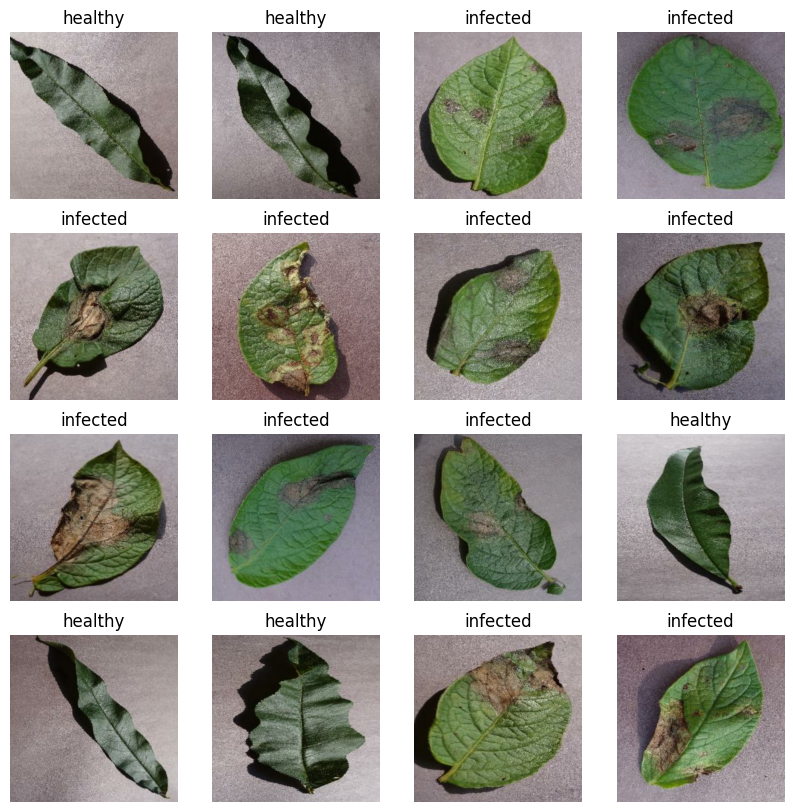

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
  for i in range(16):
    x = plt.subplot(4,4,i+1) # Changed from 4,3 to 4,4
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

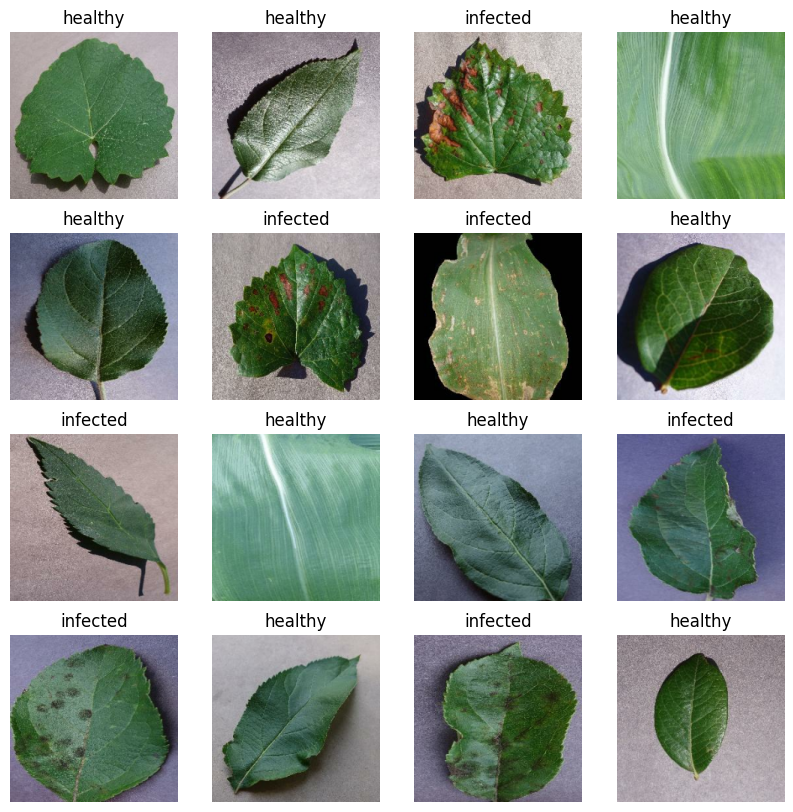

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
  for i in range(16):
    x = plt.subplot(4,4,i+1) # Changed from 4,3 to 4,4
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, kernel_size=(3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(2, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=10,verbose=1)

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.8920 - loss: 0.3063 - val_accuracy: 0.8684 - val_loss: 0.4337
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 144ms/step - accuracy: 0.9328 - loss: 0.1868 - val_accuracy: 0.9036 - val_loss: 0.3142
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.9768 - loss: 0.0725 - val_accuracy: 0.9126 - val_loss: 0.3351
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 140ms/step - accuracy: 0.9889 - loss: 0.0359 - val_accuracy: 0.9013 - val_loss: 0.3885
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 143ms/step - accuracy: 0.9931 - loss: 0.0269 - val_accuracy: 0.9195 - val_loss: 0.3760
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.9942 - loss: 0.0234 - val_accuracy: 0.8537 - val_loss: 0.5447
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.9602 - loss: 0.1208 - val_accuracy: 0.8843 - val_loss: 0.5108
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 140ms/step - accuracy: 0.9862 - loss: 0.0

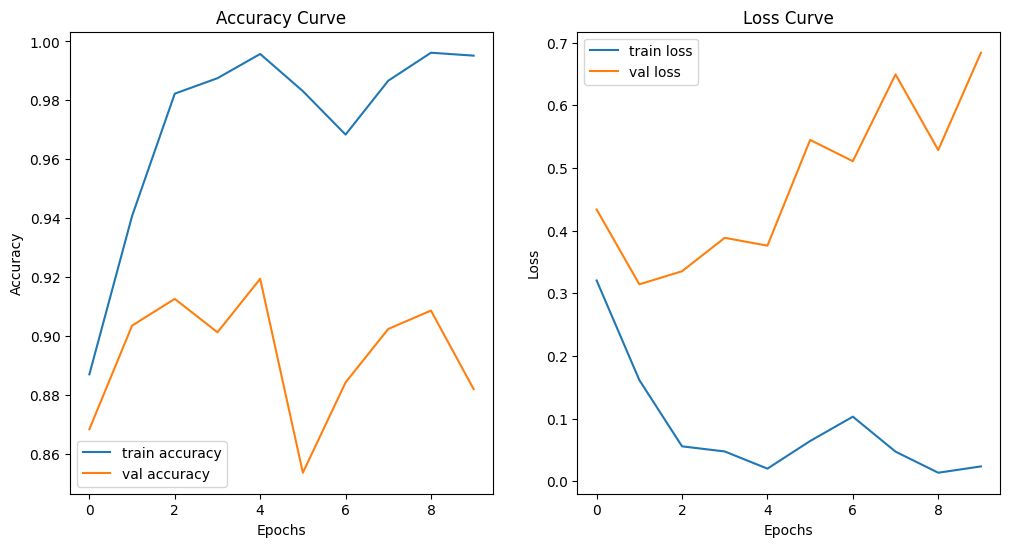

In [ ]:
# Plotting Accuracy and Loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.show()

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    image_size=(224,224),
    batch_size=32,
    shuffle=False,                      #shuffle = false means even after running shells again & again sequence of images remains same
    color_mode='rgb',
    label_mode='int'
    # class_names=['healthy1', 'infected1'] # Removed this line to infer from directories
)

Found 1515 files belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 407ms/step - accuracy: 0.5733 - loss: 4.0615
Test Loss: 2.7972567081451416
Test Accuracy: 0.6409240961074829


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step


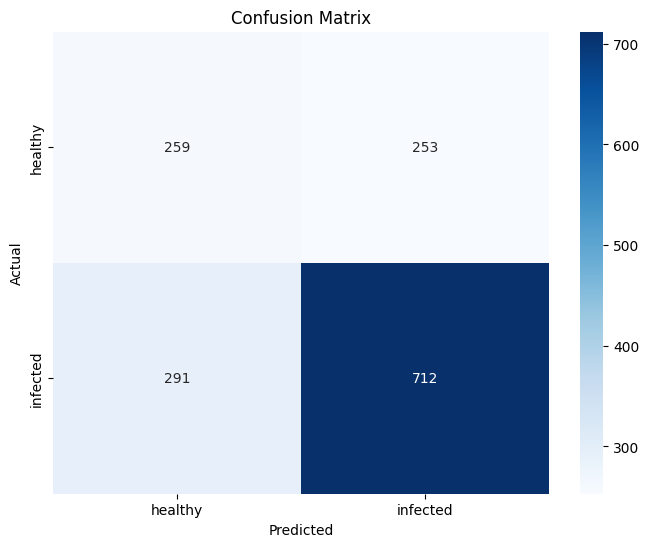

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#predictions on test data
y_pred=model.predict(test_dataset)
y_pred_classes=np.argmax(y_pred,axis=1)
#get true laels from test_dataset
y_true=np.concatenate([y.numpy() for x, y in test_dataset],axis=0)
#confusion matrix
cm=confusion_matrix(y_true,y_pred_classes)
#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
report=classification_report(y_true,y_pred_classes,digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.4709    0.5059    0.4878       512
           1     0.7378    0.7099    0.7236      1003

    accuracy                         0.6409      1515
   macro avg     0.6044    0.6079    0.6057      1515
weighted avg     0.6476    0.6409    0.6439      1515



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual Label: healthy
Predicted Label: healthy


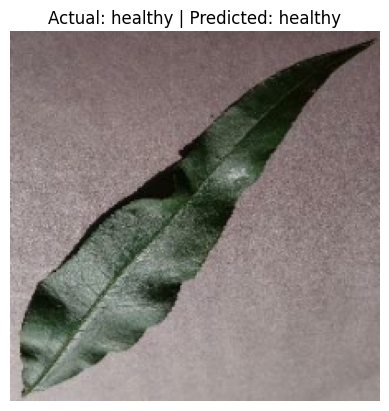

In [ ]:
# Take one batch
for images, labels in test_dataset.take(1):
    # Pick one sample (index = 1 for example)
    Unseen_sample = images[7].numpy()
    actual_label  = labels[9].numpy()

    # Model prediction
    y_prob = model.predict(tf.expand_dims(Unseen_sample, axis=0))  # add batch dimension
    y_pred = np.argmax(y_prob)

    # Print actual vs predicted
    print("Actual Label:", class_names[actual_label])
    print("Predicted Label:", class_names[y_pred])

    # Show the image
    plt.imshow(Unseen_sample.astype("uint8"))
    plt.title(f"Actual: {class_names[actual_label]} | Predicted: {class_names[y_pred]}")
    plt.axis("off")
    plt.show()
    break

Please upload your image file(s) below:


Saving 00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG to 00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG
User uploaded file "00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG" with length 11877 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


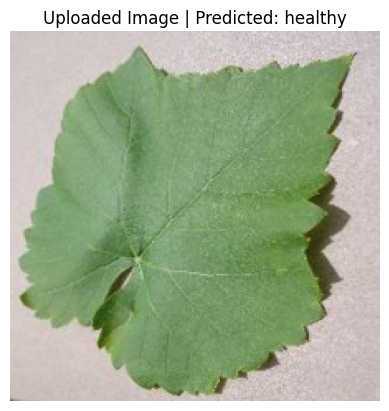

Predicted class for 00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG: healthy


In [ ]:
from google.colab import files
from PIL import Image
import io
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Please upload your image file(s) below:")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



# Check if an image was uploaded in the previous step
if 'uploaded' not in globals() or not uploaded:
  print("No file uploaded. Please run the previous cell to upload an image first.")
else:
  # Process the most recently uploaded file (or the first one if multiple)
  filename = list(uploaded.keys())[0]
  img_bytes = uploaded[filename]
  img = Image.open(io.BytesIO(img_bytes))

  # Preprocess the image for the model
  # Resize to 224x224 (as per model input_shape) and convert to numpy array
  img_resized = img.resize((224, 224))
  img_array = np.array(img_resized)

  # Add batch dimension (1, 224, 224, 3)
  preprocessed_img = np.expand_dims(img_array, axis=0)

  # Make prediction using the Keras image classification 'model'
  # Ensure 'model' variable refers to the Keras model, not LinearRegression
  if 'model' in globals() and isinstance(model, tf.keras.Sequential):
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Display the image and prediction
    plt.imshow(img_resized)
    plt.title(f"Uploaded Image | Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
    print(f"Predicted class for {filename}: {predicted_class}")
  else:
    print("Error: Keras image classification 'model' not found or incorrectly defined. Please ensure the model definition cell has been run.")